# Linear Regression GP 2

***

## Related Lessons

 - [Multiple Linear Regression](https://github.com/learn-co-curriculum/dsc-multiple-linear-regression) 

 - [Dealing with Categorical Variables Lab](https://github.com/learn-co-curriculum/dsc-dealing-with-categorical-variables-lab/tree/solution)

 - [Multicollinearity of Features Lab](https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features-lab/tree/solution)

 - [OLS Statsmodels Lab](https://github.com/learn-co-curriculum/dsc-ols-statsmodels-lab/tree/solution)

 - [Complete Regression Lab](https://github.com/learn-co-curriculum/dsc-complete-regression-lab/tree/solution)
 
 - [Log Transformations](https://github.com/learn-co-curriculum/dsc-log-transformation)
 
 - [Feature Scaling and Normalization Lab](https://github.com/learn-co-curriculum/dsc-feature-scaling-and-normalization-lab)
 
    - Topics 

  - How to interpret the results from a simple linear regression model and discuss their real-world implications.
- What multiple linear regression is and why it is useful for solving real-world problems.
- How to run a multiple linear regression model in Python using statsmodels.

## Guided Practice 2 Goals

Performing simple linear regression and understanding evaluation metrics.

- How to interpret the results from a simple linear regression model and discuss their real-world implications
- What multiple linear regression is and why it is useful for solving real-world problems
- How to run a multiple linear regression model in Python using statsmodels and scikit-learn

### First Goal

- To understand how well our model is able to **predict** future conditions, trends, or **values**.

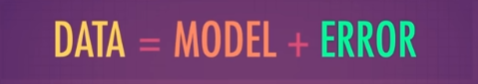

Question 1: Does our regression line fit the data well?

We make predictions on train and test data and measure the error to understand how well our model will generalize when making new predictions.

###### Scope

* We analyze the performance between the train and test predictions using various metrics:
    - MAE
    - MSE
    - RMSE
    - $R^2$
    - Adjusted $R^2$

### Second Goal

* To determine and **measure** the **relationships** between the dependent and independent variables.

Question 2: Are the coefficients statistically significant?

### Third Goal

* To **understand** how one variable **changes** when another changes

Question 3: What is the economic impact of the estimated coefficients?

##### Scope

* The coefficients and p-values are able to inform us of the influence that an independent variable has on the dependent variable.

    - Coefficients
    - $p-value$

In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# https://www.kaggle.com/datasets/mirichoi0218/insurance
insurance_df = pd.read_csv('insurance.csv')

### Data Description

| Column     | Description                                                                                                                                                                                                                |
|------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `age`      | **Age of policy holder**                                                                                                                                                                                             |
| `sex`      | **Policy Holder's gender*, female male**                                                                                                                                                                              |
| `bmi`      | **Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9** |
| `children` | **Number of children covered by health insurance/ Number of dependents**                                                                                                                                                   |
| `smoker`   | **True if currently smokes, False if does not smoke**                                                                                                                                                                      |
| `region`   | **The beneficiary's residential area in the US, northeast, southeast, southwest, northwest**                                                                                                                               |
| `charges`  | **Individual medical costs billed by health insurance in dollars**                                                                                                                                                                    |

In [3]:
## Comments & Questions

In [4]:
# create colormap
cm = sns.light_palette("purple", as_cmap=True)

# create a dataframe with the first 10 rows
# of original DataFrame
insurance_top = insurance_df.head(10)

# view DataFrame
insurance_top.style.background_gradient(cmap=cm)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900000,0,yes,southwest,16884.924000
1,18,male,33.770000,1,no,southeast,1725.552300
2,28,male,33.000000,3,no,southeast,4449.462000
3,33,male,22.705000,0,no,northwest,21984.470610
4,32,male,28.880000,0,no,northwest,3866.855200
5,31,female,25.740000,0,no,southeast,3756.621600
6,46,female,33.440000,1,no,southeast,8240.589600
7,37,female,27.740000,3,no,northwest,7281.505600
8,37,male,29.830000,2,no,northeast,6406.410700
9,60,female,25.840000,0,no,northwest,28923.136920


In [5]:
# check info on columns/data size
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# check descriptive statistics
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Categorical Variables

To begin our analysis and modeling, we will need to manipulate our categorical variables so that their information can be interpreted by the model.

First we need to identify the categorical variables in our dataset. We can take a look at the variables that have `object` or `str` datatype in our `info()` call, or plot our data to begin:

- `sex`
- `smoker`
- `region`

While there are a few ways of working with categorical variables, in this notebook we will Label Encode our variables. This means we will change their values from the original `str` to `int` values that represent the original values. This will allow our model to perform the necessary tasks for linear regression.

In [7]:
# Label Encode object variables
from sklearn.preprocessing import LabelEncoder

# instantiate a label encoder
le = LabelEncoder()

# fit the label encoder to the sex variable
# while dropping any duplicates
le.fit(insurance_df['sex'].drop_duplicates()) 

# create new sex variable with label encoded values
insurance_df['sex'] = le.transform(insurance_df['sex'])

# fit the label encoder to the smoker variable
# while dropping any duplicates
le.fit(insurance_df['smoker'].drop_duplicates()) 

# create new smoker variable with label encoded values
insurance_df['smoker'] = le.transform(insurance_df['smoker'])

# fit the label encoder to the region variable
# while dropping any duplicates
le.fit(insurance_df['region'].drop_duplicates()) 
insurance_df['region'] = le.transform(insurance_df['region'])


Other methods to transform categorical variables are the `pd.Categorical()` function which changes the datatype of a variable to a niche `categorical` datatype, which from the documentation:

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Categorical.html

"Categoricals can only take on only a limited, and usually fixed, number of possible values (categories). In contrast to statistical categorical variables, a Categorical might have an order, but numerical operations (additions, divisions, …) are not possible."

### pd.Catergorical()

In [8]:
# example of pd.Categorical
# from another project
"""
print(movies.head())
movies['rating'] = pd.Categorical(movies['rating'], ['G', 'PG', 'PG-13', 'TV-14', 'R','UNRATED', 'NOT RATED'], ordered=True)
print(movies['rating'].unique())

print(movies.dtypes)

movies['rating_codes'] = movies['rating'].cat.codes
print(movies.head())
new_movies = movies[['rating', 'rating_codes']].copy()
print(new_movies.head())
print(movies['rating'].unique())

print(movies.dtypes)



# Import pandas with alias
import pandas as pd
# Import dataset as a Pandas Dataframe
clothes = pd.read_csv('clothing.csv')
# View the data types of the dataframe
# clothes = clothes.drop(['Unnamed: 0'], axis=1)
clothes = clothes.dropna(axis=0)
print(clothes.dtypes)
# clothes = clothes[['Clothing ID', 'Age', 'Title', 'Rating', 'Division Name']]
print(clothes.head())
clothes['Rating'] = pd.Categorical(clothes['Rating'], ['very unsatisfied', 'unsatisfied', 'neutral', 'satisfied', 'very satisfied'], ordered=True)

clothes['Rating'] = clothes['Rating'].cat.codes

print(clothes.head())
"""

"\nprint(movies.head())\nmovies['rating'] = pd.Categorical(movies['rating'], ['G', 'PG', 'PG-13', 'TV-14', 'R','UNRATED', 'NOT RATED'], ordered=True)\nprint(movies['rating'].unique())\n\nprint(movies.dtypes)\n\nmovies['rating_codes'] = movies['rating'].cat.codes\nprint(movies.head())\nnew_movies = movies[['rating', 'rating_codes']].copy()\nprint(new_movies.head())\nprint(movies['rating'].unique())\n\nprint(movies.dtypes)\n\n\n\n# Import pandas with alias\nimport pandas as pd\n# Import dataset as a Pandas Dataframe\nclothes = pd.read_csv('clothing.csv')\n# View the data types of the dataframe\n# clothes = clothes.drop(['Unnamed: 0'], axis=1)\nclothes = clothes.dropna(axis=0)\nprint(clothes.dtypes)\n# clothes = clothes[['Clothing ID', 'Age', 'Title', 'Rating', 'Division Name']]\nprint(clothes.head())\nclothes['Rating'] = pd.Categorical(clothes['Rating'], ['very unsatisfied', 'unsatisfied', 'neutral', 'satisfied', 'very satisfied'], ordered=True)\n\nclothes['Rating'] = clothes['Rating'].c

In [9]:
# get dummies example from 
# curriculum - https://github.com/learn-co-curriculum/dsc-dealing-with-categorical-variables-lab/tree/solution
# Create dummy variables for your six categorical features
"""
dummies = pd.get_dummies(ames[categoricals], prefix=categoricals, drop_first=True)

ames_preprocessed = ames.drop(categoricals, axis=1)

ames_preprocessed = pd.concat([ames_preprocessed, dummies], axis=1)

ames_preprocessed.head()
"""

'\ndummies = pd.get_dummies(ames[categoricals], prefix=categoricals, drop_first=True)\n\names_preprocessed = ames.drop(categoricals, axis=1)\n\names_preprocessed = pd.concat([ames_preprocessed, dummies], axis=1)\n\names_preprocessed.head()\n'

### StatsModels vs. Sci-Kit Learn

Statsmodels is useful for more statistical analysis oriented linear regression.

SKLearn is useful for more machine learning optimaization oriented linear regression.

## StatsModels Multiple Linear Regression

In [10]:
# import statsmodels library
import statsmodels.api as sm

# create predictors
predictors = insurance_df.drop(['charges'], axis=1)

# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model to data
model = sm.OLS(insurance_df['charges'],predictors_int).fit()

Simple Linear Regression

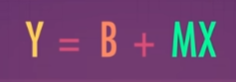

Multivariate Linear Regression Equation

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n$$

### Coefficients

In [11]:
# view model coefficients
model.params

const      -11815.452321
age           257.288075
sex          -131.110580
bmi           332.570132
children      479.369394
smoker      23820.434123
region       -353.640017
dtype: float64

### Tornado Diagram

The only trick to getting a tornado diagram is that the coefficients have to be sorted in descending order by the absolute value of the coefficient.

<AxesSubplot:>

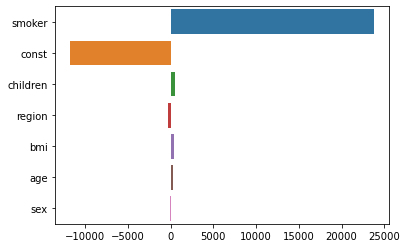

In [12]:
coeff = model.params
coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]
sns.barplot(x=coeff.values, y=coeff.index, orient='h')

With the coefficients we can explore questions 2 & 3:
    
    - To determine and measure the relationships between the dependent and independent variables
    
    - To understand how one variable changes when another changes

***Coefficients***: The coefficients of the features also describe the mathematical relationship between each independent variable and the dependent variable, which in this case is the medical costs billed by health insurance. 

The coefficient value helps us understand the marginal effect of the features on the dependent variable. **Given a one-unit change in the feature variable when the other features are unchanged, how much is the dependent variable changed**.

***
What is the economic impact of the estimated coefficient of `age`?

They also **inform us if there is a positive or negative correlation between the features and target**. For our notebook, we will assess the coefficients of our features to ensure we have features that are relevant to the charge for insurance. 

For this we can call the `.summary()` method which will display several results from our model:

### Model Summary

In [13]:
# view results of model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:57:34   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.182e+04    955.130    -12.371      0.000   -1.37e+04   -9941.729
age          257.2881     11.886     21.647      0.000     233.971     280.605
sex         -131.1106    332.811     -0.394      0.694    -784.001     521.780
bmi          332.5701     27.722     11.997      0.000     278.186     386.954
children     479.3694    137.644      3.483      0.001     209.346     749.393
smoker      2.382e+04    411.843     57.839      0.000     2.3e+04    2.46e+04
region      -353.6400    151.927     -2.328      0.020    -651.682     -55.598
==============================================================================
Omnibus:                      299.003   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              713.975
Skew:                           1.207   Prob(JB):                    9.17e-156
Kurtosis:                       5.642   Cond. No.                         296.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#dir(model)

### No. Observations

The number of observations within the data.

In [15]:
# view dimensions of the DataFrame
insurance_df.shape

(1338, 7)

### DF residuals

Degrees of Freedom is the number of values in the final calculation of a statistic that are free to vary

* Degrees of Freedom, calculated by n-k-1 where:

    - $n$ = number of observations = 1338
    - $k$ = number of predicting variables = 6
    
1338-6-1 = 1331

### DF Model

How many independent variables we have in our model: 6

### Covariance Type

Covariance : Nonrobust

Recall that covariance is a measure of how two variables are linked in a positive or negative manner, and a robust covariance is one that is calculated in a way to minimize or eliminate variables, which is not the case here. 

Robust covariance methods are based on the fact that outliers lead to an increase of the values and making the spread of the data apparently larger.

### R-squared 

The **percentage of variation explained by the relationship between the dependent variable and the independent variables**. Lies within values between 0 and 1.

$$SS_{residual} = \sum (y - \hat{y})^2 $$

is the squared difference between $y$ and $\hat y$ (predicted y)

$$SS_{total} = \sum (y - \bar{y})^2 $$

is the squared difference between $y$ and $\overline y$ (mean of y)

So that

$$R^2 = 1- \dfrac{SS_{residual}}{SS_{total}}$$


In [16]:
# percentage of variance in the y variable explained by the x variable
model.rsquared

0.7507372027994937

This means there is **75.1% less variation around the regression line than the mean**, or the relationship between the dependent variable and the independent variables explains 75.1% of the variation in the data.

We can also say that 24.9% of the variation of the `charges` variable within the data is not explained by our model.

### Adjusted R-squared

***Adjusted $R^2$***: The Adjusted $R^2$ is **a key metric for evaluation of a multivariate linear regression model**, as **it accounts for the number of predictors in a model** when calculating the model's goodness-of-fit. It is a more accurate measure for assessing if our model explains changes in the dependent variable. 

$$R^2_{adj}= 1-(1-R^2)\dfrac{n-1}{n-p-1}$$

In [17]:
# display adjusted r-squared
model.rsquared_adj

0.7496135538263885

An Adjusted R-squared value of 0.750 can be described conceptually as: 

> ***75.0% of the variations in dependent variable $y$ are explained by the independent variables $x$ in our model.***

High Adjusted R-squared doesn’t mean that your model is good. We need to check the residual plot when fitting a regression model.

The good fit indicates that normality is a reasonable approximation.

### F-statistic

R-squared measures the strength of the relationship between our model and the dependent variable. 

However, it is not a formal test for the relationship. The F-test of overall significance is the hypothesis test for this relationship. 

The F-test of overall significance informs us **whether our linear regression model provides a better fit to the data than a model that contains no independent variables, or the intercept-only model.** 

For the intercept-only model, all of the model’s predictions equal the mean of the dependent variable. 

If the overall F-test is statistically significant, our model’s predictions are an improvement over using the mean.

In [18]:
# f-statistic to compare p-value
model.fvalue

668.1243170852778

The F-test for overall significance has two hypotheses:

**_Null Hypothesis_** $H_{0}$ : The intercept-only model fits the data as well as our model.

**_Alternative Hypothesis_** $H_{1}$ : The model fits the data better than the intercept-only model.

The null hypothesis should contain an equality (=, ≤ ,≥):
  - Average NBA Player's Height = 2.0m (6ft7in)
  - 𝐻0 : 𝜇 = 2.0

The alternate hypothesis should not have an equality (≠,<,>):

 - Average NBA Player's Height ≠ 2.0m (6ft7in)
 - 𝐻1 : 𝜇 ≠ 2.0 

### Prob (F-statistic)

The Prob (F-statistic) or p-value for the f-statistic informs us of the **likelihood that we would observe the values of our data** or values at least as extreme as the results actually observed **by random chance if there were no relationship between the features of our model and the** dependent variable, in this case the **medical costs billed by health insurance**.

In [19]:
# p-value for the liklihood our model 
# fits the data better than the mean
model.f_pvalue

0.0

Here we have a p-value of 0, and a quite large f-statistic value, which suggests to us that **we can reject the null hypothesis**, and assume the model fits the data better than the intercept-only model.

Compare the p-value for the F-test to our **significance level of 0.05**. If the p-value is less than the significance level, our sample data provides sufficient evidence to conclude that our regression model fits the data better than the model with no independent variables.

We can say that **there is a linear relationship between the features of our model and the medical costs billed by health insurance** with **95% confidence**.

It is also important to note that **we consider all of the features together for the f-statistic**.

### Std Error

The standard error can be thought of as a measure of the precision with which the regression coefficient is measured. The standard error of the coefficient is always positive.The smaller the standard error, the more precise the estimate.

Here we can see that the standard error of the `age` coefficient is smaller than that of `bmi`.Therefore, our model was able to estimate the coefficient for `age` with greater precision.

If we divide the coefficient by the std error, we calculate the t-value.

In [20]:
# return the standard error for 
# all coefficients in the equation
model.bse

const       955.129513
age          11.885743
sex         332.810704
bmi          27.722166
children    137.644218
smoker      411.842878
region      151.926590
dtype: float64

### T - test

To infer if a given feature is significant or relevant to the target variable, we **perform a t-test**. Here instead of **considering all of the features individually**, we perform a t-test on the dependent variable and the features one by one. 

**_Null Hypothesis_** $H_{0}$ : If the independent variables' t value is equal to 0, then the intercept-only model **fits the data as well** as our model.

**_Alternative Hypothesis_** $H_{1}$ : If the indendent variable's t value is not equal to 0, then the model **fits the data better** than the intercept-only model.

In [21]:
# display t-value for hours variable
model.tvalues[1]

21.64678057216227

The farther the t-value is away from 0, the greater the chances that we reject the null hypothesis and accept the alternate hypothesis for that feature. 

With a t-value of `21.65`, we can say that we are more likely to accept the alternate hypothesis that the model fits the data better than the intercept-only model.

Here we see that the feature with a t-value closest to 0 is `sex`. This feature may not have a statistically significant relationship to the medical costs billed by health insurance.

### P>|t|  or p-value 

p-values for the t-test

Again we can compare the p-values, or **likelihood that we would observe our data by random chance if our features had no statistically significant relationship to the `charges` variable**. When we compare the p-values of our features with a significance threshold of 0.05individually, if:

 - 𝑝 < $0.05$ : Reject that there is no relationship between the features of our model and the medical costs billed by health insurance.
 

 - 𝑝 >= $0.05$ : Accept the null hypothesis. There is no relationship between the features of our model and the medical costs billed by health insurance.

In [22]:
# check t-statistic probability score for constant
model.pvalues[0]

2.3753824947315803e-33

Here we could consider **all of our features sharing a statistically significant relationship with the medical costs billed by health insurance** with **95% confidence** except for `sex`.

***
Based on the p-value of the t-test, which feature has the least statistical influence on the dependent variable?

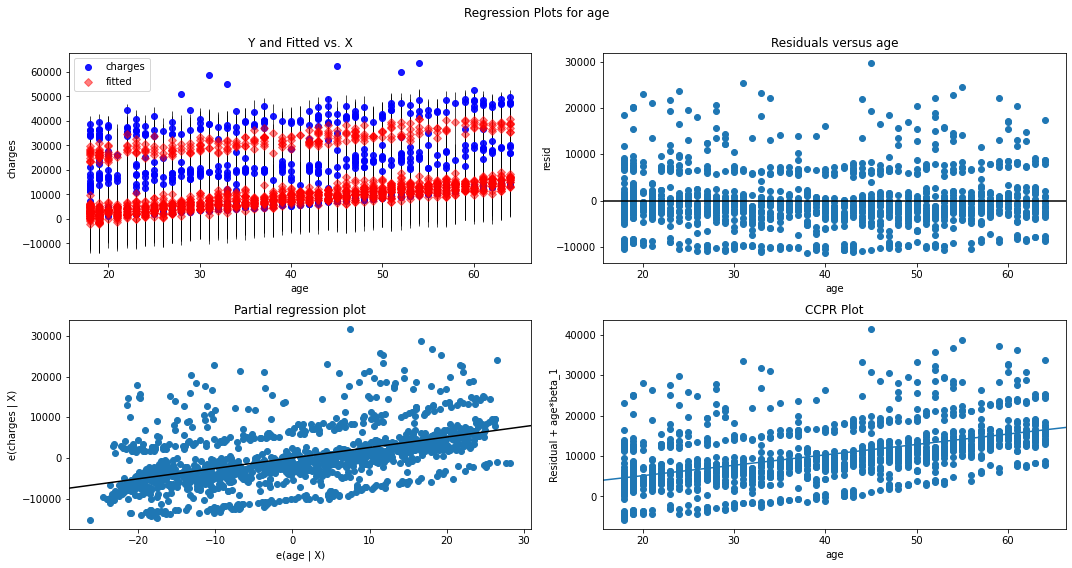

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "age", fig=fig)
plt.show()

### Mean Absolute Error

Mean Absolute Error MAE: Represents average error

$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_{i} - \hat y_{i}|$$

In [24]:
# return residuals from model
residuals = model.resid

# view residuals
residuals

0       -8226.317864
1       -1962.052873
2       -2513.683707
3       18243.162205
4       -1670.785697
            ...     
1333    -1701.457702
1334    -1225.390847
1335    -2733.828866
1336      900.958387
1337    -7872.367796
Length: 1338, dtype: float64

In [25]:
# return predicted values from model
y_pred = model.fittedvalues

# view predicted values
y_pred

0       25111.241864
1        3687.605173
2        6963.145707
3        3741.308405
4        5537.640897
            ...     
1333    12302.006002
1334     3431.371647
1335     4363.662366
1336     1106.986613
1337    37013.728096
Length: 1338, dtype: float64

In [26]:
# true y value
y = insurance_df["charges"]

In [27]:
# return mean absolute error of model
mae_resid = np.mean(np.abs(y - y_pred))

# view residuals from model
mae_resid

4172.48711494405

The MAE informs us that **on average, our model has an error of** `4172.49` USD when **predicting the charge of insurance for a patient**.

### Mean Squared Error

The Mean Squared Error, or MSE tells us how close a regression line is to a set of true points. This is achieved by squaring the errors. It contrasts to MAE because it gives more weight to larger distances between the points to the regression line.

**MSE is more useful if we are concerned about large errors whose consequences are much larger than equivalent smaller ones**.

$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$$

In [28]:
# return Mean Squared Error of model
mse_resid = model.mse_resid

# view Mean Squared Error
mse_resid

36719766.28628327

Our MSE is useful if we are comparing the predictive performance of two or more models. It's values are less interpretable than MAE and RMSE because they are not in the same units as our dependent variable.

Here we are effectively saying our model has an error of `36719766.29` USD squared...

### Root Mean Squared Error

Root Mean Square Error: Interpretable MSE in units of y. 

RMSE is more sensitive to outliers, and penalizes large errors more than MAE because errors are squared.

$$RMSE = \sqrt\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$$

In [29]:
# return Root Mean Squared Error
rmse_residuals = np.sqrt(model.mse_resid)

# view Root Mean Squared Error
rmse_residuals

6059.683678731363

Here our RMSE informs us that the expected error between the true value and the value our model predicts is `6059.68` USD when predicting the score of a project in our training data. 

**This is larger than our MAE of `4172.49`. When MAE < RMSE, it can be indicative that there are outliers present in our data**.

## Assumptions of Linear Regression

At this point, it is important to keep the assumptions of linear regression in mind as model our data. If these assumption are not met, we can not be confident in the accuracy of our model. The assumptions we will explore in this notebook are:

- Linearity: there is a linear relationship between the independent and dependent variables
- Homoscedasticity: the variance for the residual is the same for any value of x
- Independence: observations are independent of one another
- Normality: residuals are normally distributed

In [30]:
# https://www.kaggle.com/code/shrutimechlearn/step-by-step-assumptions-linear-regression/notebook

### Linearity

Pairplots are useful tools to check for linearity between the dependent and independent variables. 

- Ask yourself "What pattern do I see?". If a straight line appears to fit the data well, this is a great sign* that there is a linear relationship between the independent and dependent variables.

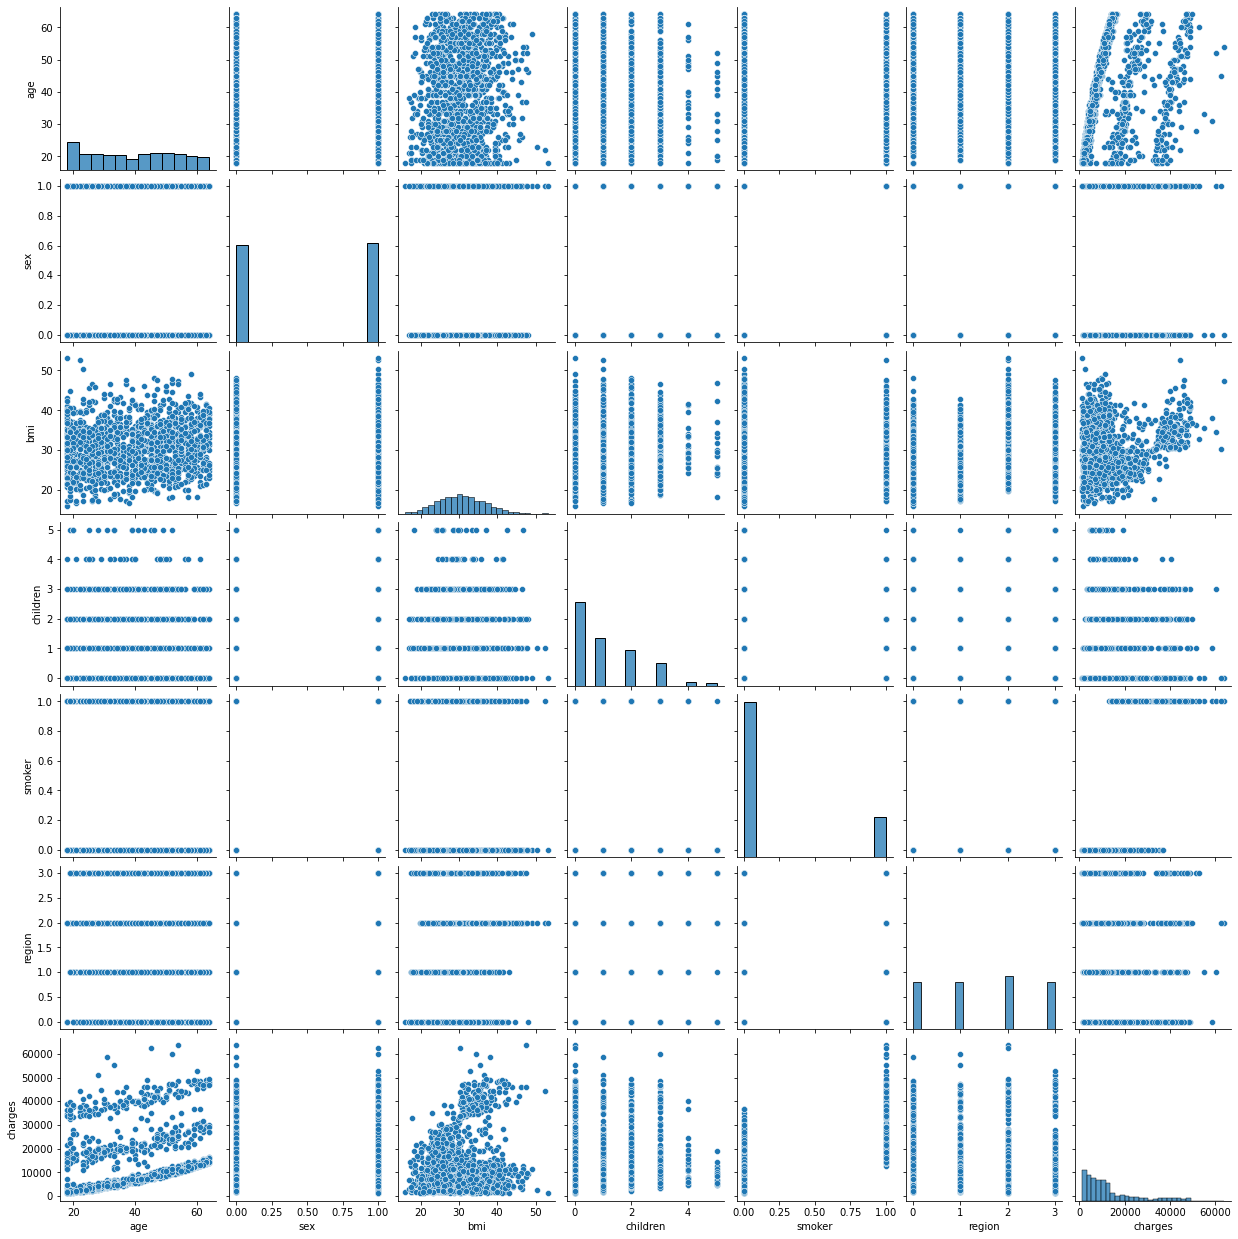

In [31]:
# view scatter plots and distribution plots for variables
sns.pairplot(insurance_df)

### Homoscedasticity

Simply put we want to find homoscedasticity. This means that the residuals have equal or almost equal variance over the entire regression model. 

If there are any patterns when we plot residuals by predicted values, such as residuals being higher when the score is higher, etc. it is a sign of heteroscedasticity.

By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.¶

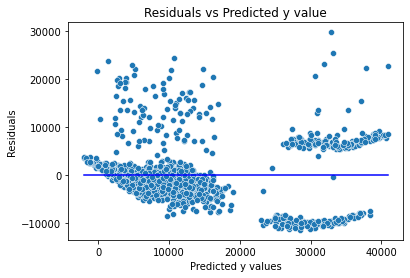

In [32]:
# plot the residuals against predicted values to 
# check for homoscedasticity
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('Predicted y values')
plt.ylabel('Residuals')
#plt.xlim(70,100)
p = sns.lineplot([y_pred.min(),y_pred.max()],[0,0],color='blue')
p = plt.title('Residuals vs Predicted y value')

There appears to be an interesting pattern when we plot our residuals against the fitted values. Where as we were hoping to see randomness, there are clear groupings of seemingly in the four quadrants of the plot. Let's further explore this assumption.

### Goldfeld Quandt Test

Another method to check if the variance for the residual is the same for any value of x is to use the Goldfeld Quandt test. The Goldfeld Quandt test is a hypothesis test with the following hypotheses:

**_Null Hypothesis_** $H_{0}$ : The variance of the residuals of the model are the same for any value of x (Homoscedastic)

**_Alternative Hypothesis_** $H_{1}$ : The variance of the residuals of the model are note the same for any value of x (Heteroscedastic)

In [33]:
# run Goldfeld Quandt Test
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']


test = sms.het_goldfeldquandt(residuals, predictors_int)
lzip(name, test)

[('F statistic', 0.9566557936681557), ('p-value', 0.7155988668351111)]

Here our p-value is `0.716` much greater than `0.05`. This means we are not able to reject the null hypothesis which states our error terms are homoscedastic. 

This further validates the assumption of homoscedasticity of our residuals.

### Normality

We want to check that the residuals are normally distributed

the central limit theorem says that as the sample size increases the distribution tends to be normal. A skew is also visible from the plot. 

In [34]:
# https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/10_multiple_regression.html

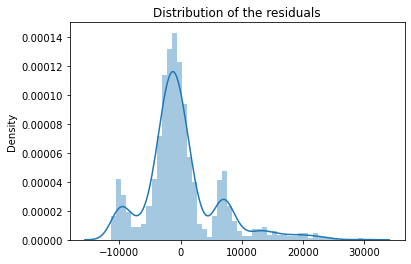

In [35]:
# check for normality among the residuals
p = sns.distplot(residuals,kde=True)
p = plt.title('Distribution of the residuals')

In [36]:
# import stats module from scipy
from scipy import stats

# create mean and standard deviation
mu, std = stats.norm.fit(residuals)
mu, std

(1.3186993433777883e-11, 6043.811701706331)

Let's re-plot the residuals as a kernel density plot and overlay the normal curve with the same mean and standard deviation:

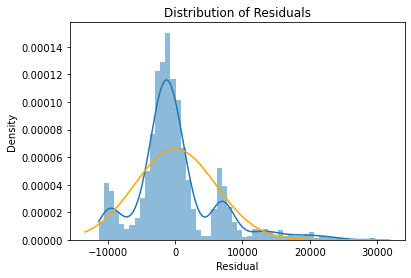

In [37]:
fig, ax = plt.subplots()
# plot the residuals
sns.histplot(x=residuals, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of Residuals", xlabel="Residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

<AxesSubplot:>

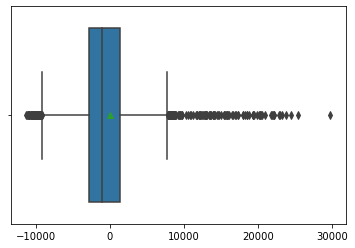

In [38]:
# view boxplot of residuals
sns.boxplot(residuals, showmeans=True)

#### Q-Q plot

The Q-Q plot, or quantile-quantile plot, is a visual check we can use to confirm if the a given distribution belongs to a particular distribution, in this case the Normal Distribution.

Here we compare our distribution of the residuals to the Normal distribution.

The x-axis of a Q-Q plot represents the quantiles of standard normal distribution.



In [39]:
#https://data.library.virginia.edu/understanding-q-q-plots/

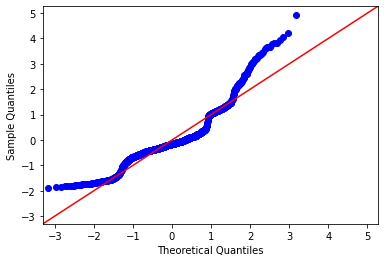

In [40]:
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

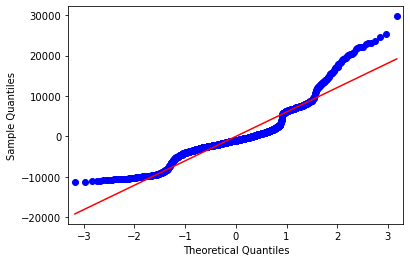

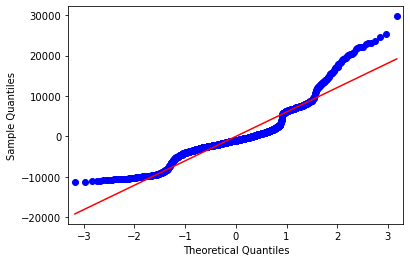

In [41]:
# create a Q-Q plot of the residuals
sm.qqplot(residuals, line ='s')

((array([-3.28061069, -3.02161974, -2.87748242, ...,  2.87748242,
          3.02161974,  3.28061069]),
  array([-11342.85019497, -11187.80256903, -11115.61625673, ...,
          24493.41388608,  25441.53377664,  29751.48931781])),
 (5742.412141200813, 1.4548926427097534e-11, 0.948086438808191))

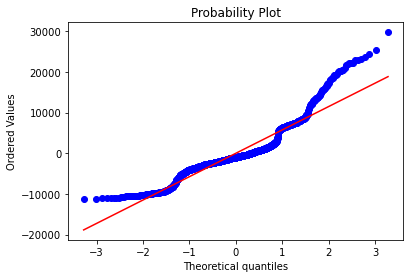

In [42]:
import numpy as np 
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)

Whenever we encounter issues with our Q-Q plots, we can attempt to remove the outliers from our data to help our residuals

In [43]:
''' Detection '''
# IQR
Q1 = np.percentile(insurance_df['charges'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(insurance_df['charges'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", insurance_df.shape)
 
# Upper bound
upper = np.where(insurance_df['charges'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(insurance_df['charges'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
insurance_df.drop(upper[0], inplace = True)
insurance_df.drop(lower[0], inplace = True)
 
print("New Shape: ", insurance_df.shape)

Old Shape:  (1338, 7)
New Shape:  (1198, 7)


<AxesSubplot:xlabel='charges'>

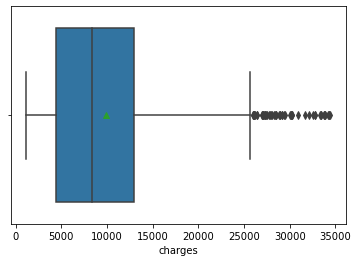

In [44]:
# check charges variable for outliers
sns.boxplot(insurance_df["charges"], showmeans=True)

This boxplot confirms our work, there are no more outliers present in the `charges` variable.

In [45]:
# create predictors
predictors = insurance_df.drop(['charges'], axis=1)

# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model to data
model = sm.OLS(insurance_df['charges'],predictors_int).fit()

In [46]:
# return residuals from model
residuals = model.resid

<AxesSubplot:>

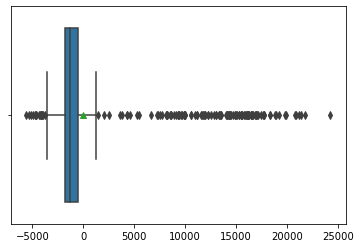

In [47]:
# view boxplot of residuals
sns.boxplot(residuals, showmeans=True)

There are so many outliers in our residuals, this box plot is indicative that the mean of the resisuals is not 0.

In [48]:
# view model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     303.8
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          5.06e-236
Time:                        15:57:39   Log-Likelihood:                -11785.
No. Observations:                1198   AIC:                         2.358e+04
Df Residuals:                    1191   BIC:                         2.362e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2661.8041    785.636     -3.388      0.001   -4203.189   -1120.420
age          243.7071      9.420     25.871      0.000     225.225     262.189
sex         -391.0026    262.843     -1.488      0.137    -906.690     124.685
bmi           61.7418     22.985      2.686      0.007      16.646     106.838
children     428.0298    108.260      3.954      0.000     215.628     640.431
smoker       1.45e+04    427.229     33.929      0.000    1.37e+04    1.53e+04
region      -485.4801    119.876     -4.050      0.000    -720.671    -250.289
==============================================================================
Omnibus:                      757.095   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5411.028
Skew:                           3.034   Prob(JB):                         0.00
Kurtosis:                      11.460   Cond. No.                         310.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

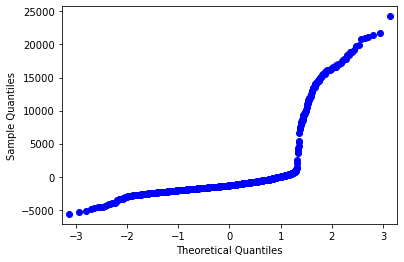

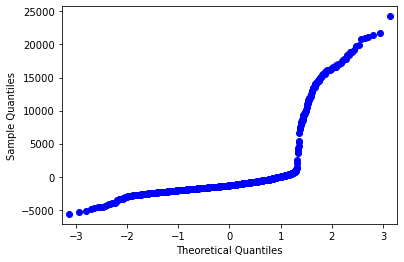

In [49]:
# create a Q-Q plot of the residuals
sm.qqplot(residuals)

## Feature Scaling

Feature scaling is a method used to normalize our data. By fitting our data to a common range of values, we can better align our model with the assumptions of linear regression.

## Log Transform

Transforming these initial features to have certain properties such as normality will improve the regression algorithms predictive performance

In fact, you'll often find that having the data more normally distributed will benefit your model and model performance in general. So while normality of the predictors is not a mandatory assumption, having (approximately) normal features may be helpful for your model!

When we take a look at the distributions of our data in the pairplot above, we can see several variables that do not have a normal distribution, some being `age`, `children`, and `charges`.

Let's perform a log transform on the `charges` variable to normalize it and hopefully improve our performance.

In [50]:
# create non normal variables list
non_normal = ['charges']

# use for loop to apply log transform on variable
for feat in non_normal:
    insurance_df[feat] = insurance_df[feat].map(lambda x: np.log(x))

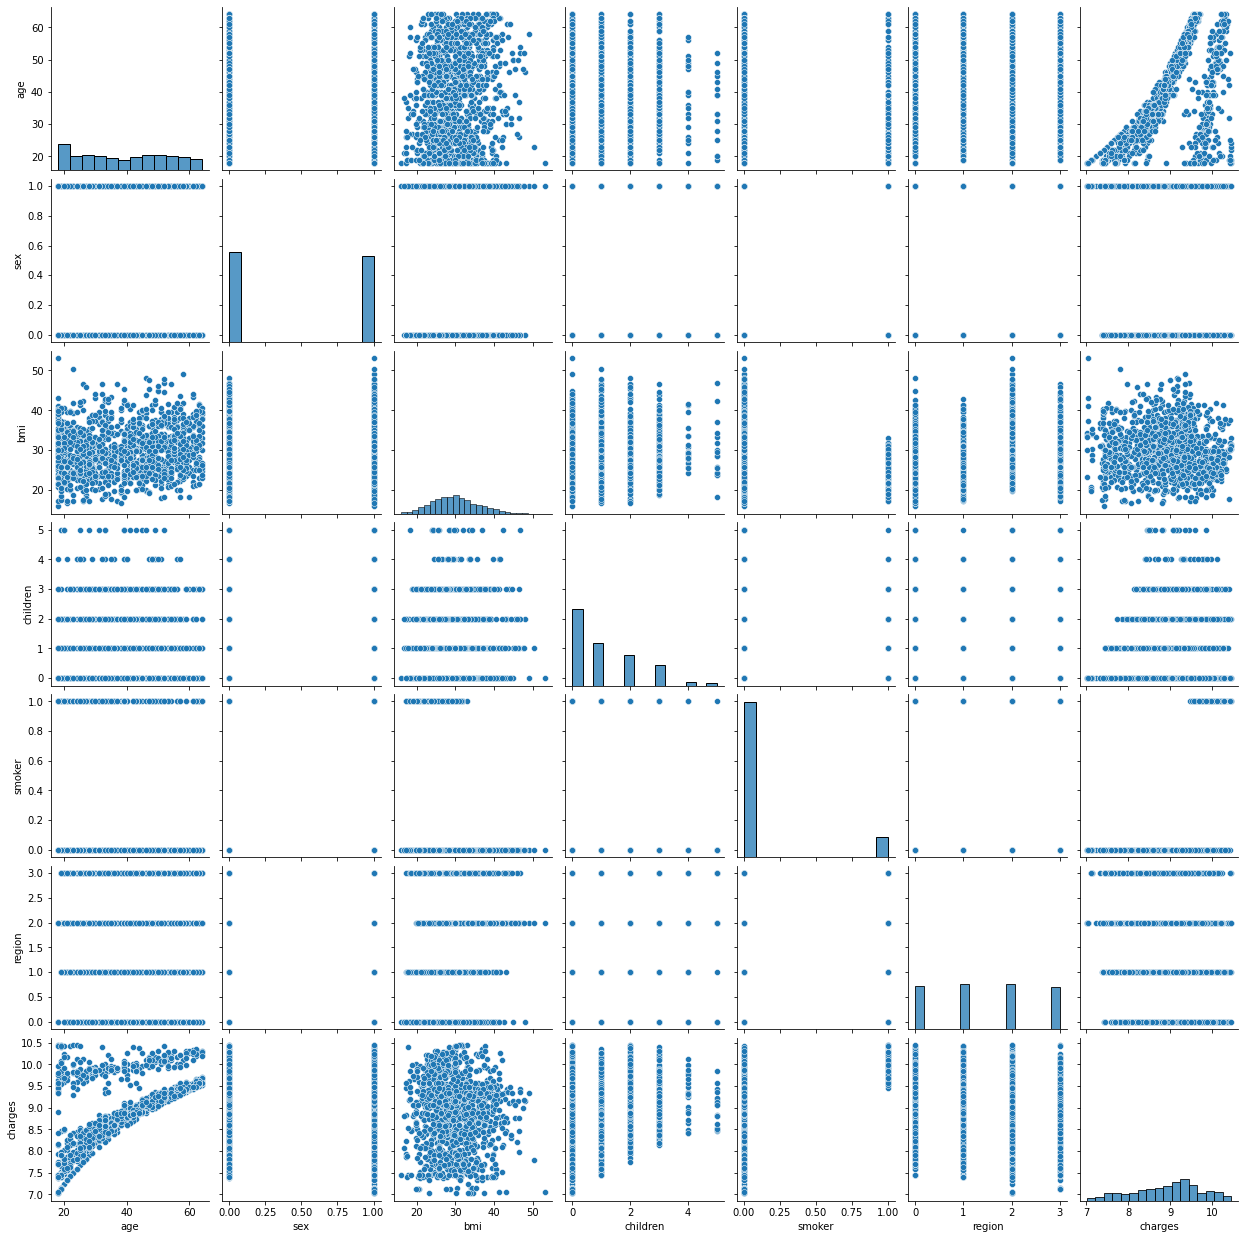

In [51]:
# view new distribution of data
sns.pairplot(insurance_df)

The `charges` distribution appears to be more normal. Let's fit a linear regression model to this data to determine if our performance improves with this change.

In [52]:
# create predictors
predictors = insurance_df.drop(['charges'], axis=1)

# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model to data
model = sm.OLS(insurance_df['charges'],predictors_int).fit()

\begin{equation}
\log(y_i) = \beta_0 + \beta_1 x_{1i} +  \cdots + \beta_k x_{ki} + e_i  ,
\end{equation}

In [53]:
# view model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     486.4
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          4.39e-316
Time:                        15:57:44   Log-Likelihood:                -683.47
No. Observations:                1198   AIC:                             1381.
Df Residuals:                    1191   BIC:                             1417.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1975      0.074     96.948      0.000       7.052       7.343
age            0.0374      0.001     41.974      0.000       0.036       0.039
sex           -0.0892      0.025     -3.593      0.000      -0.138      -0.041
bmi            0.0043      0.002      1.971      0.049    1.92e-05       0.009
children       0.1091      0.010     10.662      0.000       0.089       0.129
smoker         1.3041      0.040     32.301      0.000       1.225       1.383
region        -0.0594      0.011     -5.246      0.000      -0.082      -0.037
==============================================================================
Omnibus:                      579.495   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3080.635
Skew:                           2.258   Prob(JB):                         0.00
Kurtosis:                       9.428   Cond. No.                         310.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our $R^2$ has increased to `0.767`, great!

However look at the change in our coefficients! 

## Log Transformation Interpretation

In [54]:
# https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/

Now that we have transformed our dependent variable, we need to interpret our model coefficients differently.

When we perform a log transform on our dependent variable, we transform the relationship between it and the features into one more multiplicative than additive, so we need to express the marginal effect in terms of percent.

When we only log-transform the dependent variable, we exponentiate the coefficient, subtract one from this number, and multiply by 100. 

This will yield the percent increase (or decrease) in the response for every one-unit increase in the independent variable. 

So here we can use the `age` variable as an example, with a coefficient of `0.0347` 

Recall exponentiation is the inverse of the logarithm function, so we exponentiate the variable's coefficient, subtract it by `1` and multiply `100`:

In [55]:
# calculate percent change in dependent variable
# based on independent variable
np.exp(model.bse[1] - 1) * 100

36.82070657448464

Here we can see that for every one-unit increase in `age`, our dependent variable increases by `36.8`%.

## Normalization

##### Min-Max Scaling

This method of feature scaling typically rescales the range of the features so that the largest value would be converted to `1`, and the lowest value would be converted to `0`.

It is possible to rescale the values in the dataset between any two values.

Impact of Outliers is very high in Normalization

The formula we follow when performing min-max scaling to transform x is:

$$x' = \dfrac{x - \min(x)}{\max(x)-\min(x)}$$

In [56]:
# view DataFrame columns
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [57]:
# import preprocessing module from sklearn
from sklearn import preprocessing

# Use min max scaling on dataset
minmax_scale = preprocessing.MinMaxScaler().fit(insurance_df[['age', 'bmi', 'children']])
#df_minmax = pd.DataFrame(minmax_scale.transform(insurance_df[['age', 'bmi', 'children']]))
df_minmax = minmax_scale.transform(insurance_df[['age', 'bmi', 'children']])

In [58]:
# view scaled values
df_minmax

array([[0.02173913, 0.3212268 , 0.        ],
       [0.        , 0.47914985, 0.2       ],
       [0.2173913 , 0.45843422, 0.6       ],
       ...,
       [0.        , 0.56201238, 0.        ],
       [0.06521739, 0.26472962, 0.        ],
       [0.93478261, 0.35270379, 0.        ]])

In [59]:
# check shape of array
df_minmax.shape

(1198, 3)

In [60]:
# create a copy of insurance dataframe
insurance_df2 = insurance_df.copy()

# drop old columns
insurance_df2 = insurance_df2.drop(['age', 'bmi', 'children'], axis= 1)

In [61]:
insurance_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sex      1198 non-null   int64  
 1   smoker   1198 non-null   int64  
 2   region   1198 non-null   int64  
 3   charges  1198 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 79.1 KB


In [62]:
# create new DataFrame with minmax variables
# add NumPy matrix as new columns in DataFrame
insurance_df2 = pd.concat([insurance_df2, pd.DataFrame(df_minmax)], axis=1)

In [63]:
# view DataFrame
insurance_df2.head()

,sex,smoker,region,charges,0,1,2
0,0.0,1.0,3.0,9.734176,0.021739,0.321227,0.0
1,1.0,0.0,2.0,7.453302,0.000000,0.479150,0.2
2,1.0,0.0,2.0,8.400538,0.217391,0.458434,0.6
3,1.0,0.0,1.0,9.998092,0.326087,0.181464,0.0
4,1.0,0.0,1.0,8.260197,0.304348,0.347592,0.0


In [64]:
# view DataFrame
insurance_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sex      1198 non-null   float64
 1   smoker   1198 non-null   float64
 2   region   1198 non-null   float64
 3   charges  1198 non-null   float64
 4   0        1198 non-null   float64
 5   1        1198 non-null   float64
 6   2        1198 non-null   float64
dtypes: float64(7)
memory usage: 82.7 KB


In [65]:
# rename new columns
# insurance_df2 = insurance_df2.rename(columns={"0": "age", "1": "bmi", "2": "children"}, axis= 1) # abc
# insurance_df2.columns = ["sex", "smoker", "region", "charges", "age", "bmi", "children"]

# view DataFrame
insurance_df2.head()

,sex,smoker,region,charges,0,1,2
0,0.0,1.0,3.0,9.734176,0.021739,0.321227,0.0
1,1.0,0.0,2.0,7.453302,0.000000,0.479150,0.2
2,1.0,0.0,2.0,8.400538,0.217391,0.458434,0.6
3,1.0,0.0,1.0,9.998092,0.326087,0.181464,0.0
4,1.0,0.0,1.0,8.260197,0.304348,0.347592,0.0


In [66]:
# check for missing values
insurance_df2.isna().any()

sex        True
smoker     True
region     True
charges    True
0          True
1          True
2          True
dtype: bool

In [67]:
# have to find out what is causing missing values

In [68]:
# check missing count
insurance_df2.isnull().sum()

sex        125
smoker     125
region     125
charges    125
0          125
1          125
2          125
dtype: int64

In [69]:
# drop missing values
insurance_df2 = insurance_df2.dropna()

In [70]:
# create predictors
predictors2 = insurance_df2.drop(['charges'], axis=1)

# create model intercept
predictors_int2 = sm.add_constant(predictors2)

# fit model to data
model2 = sm.OLS(insurance_df2['charges'], predictors_int2).fit()

In [71]:
# view model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     51.28
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           1.44e-55
Time:                        15:57:44   Log-Likelihood:                -1137.1
No. Observations:                1073   AIC:                             2288.
Df Residuals:                    1066   BIC:                             2323.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9641      0.074    120.580      0.000       8.818       9.110
sex           -0.1232      0.043     -2.872      0.004      -0.207      -0.039
smoker         1.1629      0.068     16.996      0.000       1.029       1.297
region        -0.0517      0.019     -2.669      0.008      -0.090      -0.014
0              0.0368      0.071      0.522      0.602      -0.102       0.175
1             -0.0884      0.134     -0.660      0.510      -0.352       0.175
2             -0.0657      0.089     -0.739      0.460      -0.240       0.109
==============================================================================
Omnibus:                       27.057   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.346
Skew:                          -0.313   Prob(JB):                     5.17e-06
Kurtosis:                       2.610   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Standardization

When we perform standardization on our data, we change the mean and variance so that then mean is equal to 0 and standard deviation for one.

Our goal with scaling is 

This is done by taking each value of a variable, subtracting the mean of the variable

When 

$$x' = \dfrac{x - \bar x}{\sigma}$$

x' will have mean $\mu = 0$ and $\sigma = 1$

Note that standardization does not make data $more$ normal, it will just change the mean and the standard error!


Standardization may be used when data represent Gaussian Distribution, while Normalization is great with Non-Gaussian Distribution

standardized regression coefficients provide an easy way to estimate effect size that is independent of units.

In Python:

Transform the Y and each column of the X matrices into standardize values (z-scores) with mean = 0 and standard deviation = 1.0.

Run the regression with the standardized inputs. This provides standardized regression coefficients

Extract and display the standardized coefficient:

## Standard Scaling

Now let's scale the columns within the dataframe that are not categorical, and use them to feed into a linear model to test its performance.

In [72]:
# check variable types
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1198 non-null   int64  
 1   sex       1198 non-null   int64  
 2   bmi       1198 non-null   float64
 3   children  1198 non-null   int64  
 4   smoker    1198 non-null   int64  
 5   region    1198 non-null   int64  
 6   charges   1198 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 107.2 KB


In [73]:
# Scale features in dataframe
std_scale = preprocessing.StandardScaler().fit(insurance_df[["age", "bmi", "children", "region"]])
df_std = std_scale.transform(insurance_df[["age", "bmi", "children", "region"]])

In [74]:
# create a copy of insurance dataframe
insurance_df3 = insurance_df.copy()

# drop old columns
insurance_df3 = insurance_df3.drop(['age', 'bmi', 'children', "region"], axis= 1)

In [75]:
# view array of standardized values
df_std

array([[-1.42251495, -0.36489131, -0.89393054,  1.35949166],
       [-1.49363179,  0.61180122, -0.07013917,  0.45718085],
       [-0.78246336,  0.48368312,  1.57744358,  0.45718085],
       ...,
       [-1.49363179,  1.12427361, -0.89393054,  0.45718085],
       [-1.28028126, -0.71430431, -0.89393054,  1.35949166],
       [ 1.56439246, -0.17021835, -0.89393054, -0.44512996]])

In [76]:
# view shape of array
df_std.shape

(1198, 4)

In [77]:
# create new DataFrame with minmax variables
#add NumPy matrix as new columns in DataFrame
insurance_df3 = pd.concat([insurance_df3, pd.DataFrame(df_std)], axis=1)

# view new DataFrame info
insurance_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sex      1198 non-null   float64
 1   smoker   1198 non-null   float64
 2   charges  1198 non-null   float64
 3   0        1198 non-null   float64
 4   1        1198 non-null   float64
 5   2        1198 non-null   float64
 6   3        1198 non-null   float64
dtypes: float64(7)
memory usage: 82.7 KB


In [78]:
# drop missing values
insurance_df3 = insurance_df3.dropna()

In [79]:
# create predictors
predictors3 = insurance_df3.drop(['charges'], axis=1)

# create model intercept
predictors_int3 = sm.add_constant(predictors3)

# fit model to data
model3 = sm.OLS(insurance_df3['charges'], predictors_int3).fit()

In [80]:
# view model results
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     50.19
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           1.80e-54
Time:                        15:57:44   Log-Likelihood:                -1139.7
No. Observations:                1073   AIC:                             2293.
Df Residuals:                    1066   BIC:                             2328.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8543      0.031    287.356      0.000       8.794       8.915
sex           -0.1231      0.043     -2.862      0.004      -0.207      -0.039
smoker         1.1700      0.069     17.071      0.000       1.036       1.304
0              0.0129      0.022      0.594      0.552      -0.030       0.055
1             -0.0170      0.022     -0.774      0.439      -0.060       0.026
2             -0.0126      0.022     -0.583      0.560      -0.055       0.030
3              0.0307      0.022      1.408      0.159      -0.012       0.073
==============================================================================
Omnibus:                       24.487   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.156
Skew:                          -0.317   Prob(JB):                     9.37e-06
Kurtosis:                       2.660   Cond. No.                         3.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Data Leakage

#### Mean of Residuals = 0: 

When our residuals have a mean of zero, it is another indicator that they are normally distributed and thus do not form patterns or contain much information hidden from the model.

In [81]:
# calculate and print the mean of residuals
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 6.067726547512628e-12


### Independance of Residuals

Ensure that residuals are independent of one another

#### Autocorrelation

When checking for autocorrelation among the residuals, we want to make sure our observations are independent of one another.

There should not be any kind of pattern found among our residuals, they should be independent of one another.

When using the Durbin-Watson statistic to analyze autocorrelation, we consider that the range of the DW statistic is:

$$0 ≤ DW ≤ 4$$where

- DW should be close to `2` if the Null Hypothesis $H_{0}$ = true
- DW $<$ `2` may indicate positive correlation
- DW $>$ `2` may indicate positive correlation

#### Durbin-Watson Test

The Durbin-Watson Test has two hypotheses:

**_Null Hypothesis_** $H_{0}$ : There is no autocorrelation of residuals.

   - $𝑝 = 2$ : Accept the null hypothesis. There is no relationship between the residuals of the observations.

**_Alternative Hypothesis_** $H_{1}$ : There is a strong autocorrelation between residuals.
 
   - $𝑝 < 2$ or $𝑝 > 2$: Reject that there is no relationship between the residuals of the observations.
     

In [82]:
# import durbin-watson test from statsmodels
from statsmodels.stats.stattools import durbin_watson

durbin_watson(residuals)

2.055471693695024

It looks like there is some degree of correlation between the residuals, we can plot this as well using a line plot where we connect the points of the residual against the predicted y values.

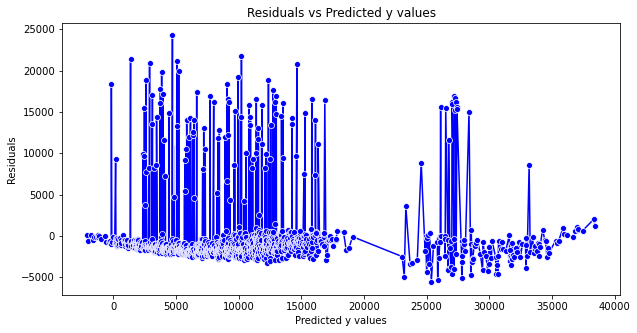

In [83]:
# check for autocorrelation using lineplot
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('Predicted y values')
plt.ylabel('Residuals')
#plt.xlim(70,100)
#p = sns.lineplot([70,100],[0,0],color='red')
p = plt.title('Residuals vs Predicted y values')

Time series is linearly related to a lagged version of itself. 

The coefficient of correlation between two values in a time series is called the autocorrelation function (ACF).

By plotting the autocorrelation function, we can visualize if there is any high autocorrelation between the residuals. Here the ACF would inform us that there is little correlation between residuals.

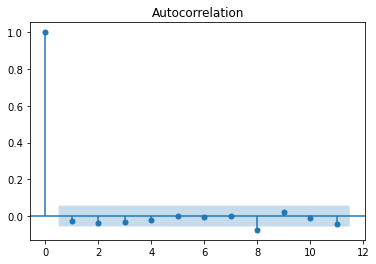

In [84]:
# check for autocorrelation with ACF
sm.graphics.tsa.plot_acf(residuals, lags=11)
plt.show()

#### No perfect multicollinearity

While we want our `hours` variable to have a statistically significant relationship to `score`, a perfect `1.0` correlation would be somewhat suspicious. Here the Pearson Correlation Coefficient for `hours` is 0.96. 

With such a small sample size it can be expected to have a high correlation coefficient.

<AxesSubplot:>

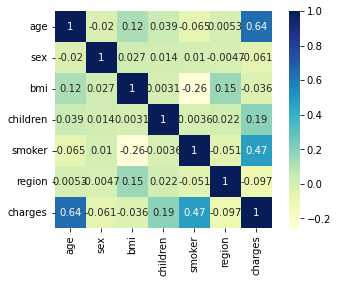

In [85]:
# heatmap of correlation between hours and score
sns.heatmap(insurance_df.corr(), annot=True,cmap='YlGnBu',square=True)

## Sklearn

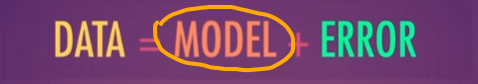

In [86]:
# import train_test_split from sci-kit learn
from sklearn.model_selection import train_test_split

In [87]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [88]:
# Create our X and y
y = insurance_df['charges']
X = insurance_df.drop(['charges'], axis=1)

In [89]:
print(len(X))
print(len(y))

1198
1198


In [90]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

# print length
print(len(X_train), len(y_train), len(X_test), len(y_test))

958 958 240 240


In [91]:
# Import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Create linear regression object
linreg = LinearRegression()

# Fit lr object to training data
linreg.fit(X_train, y_train)

LinearRegression()

In [92]:
# make predictions on training and testing data
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [93]:
# view predictions array on test data
y_hat_train

array([ 8.24463898,  9.97556892,  8.41640411,  7.97711468,  9.14208567,
        9.45133668,  7.73710728,  9.62341287,  7.97083267,  8.86931927,
       10.61546439,  8.87455821,  9.97870964,  9.40408615,  8.23644915,
        8.72987168, 10.0955664 ,  7.95140504,  9.24617857,  8.33277417,
        7.86723586, 10.41586103,  9.45160246,  8.32828644,  8.48956777,
        9.24651438,  9.403172  ,  9.14131531,  8.05660664,  8.48174463,
        7.80593292,  8.50454005,  8.07308956,  9.58212225,  9.300654  ,
        8.46459786,  9.485861  ,  7.72577526,  9.22350593,  8.01367462,
        9.18507214,  9.10953632,  8.77617751,  9.4985102 ,  9.5088162 ,
        9.35815497,  9.54088063,  8.11621267,  9.1352223 ,  9.47246434,
        7.96576777,  9.36499611,  7.90897745,  9.20175832,  7.97319359,
        8.21278898,  9.32915261,  8.0768519 ,  8.4145147 ,  9.60483296,
        8.51551176, 10.34478906, 10.36280509,  8.49655059, 10.1076629 ,
        8.67544495,  8.49567344,  9.88409337,  8.92539511,  8.10

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n $$

### Model Intercept

In [94]:
# view model intercept
print('\nModel Intercept:', linreg.intercept_)


Model Intercept: 7.265762391127832


Expect a baseline of insurance charges to be $$\hat\beta_0$$ where:
    


***Coefficients***: The coefficients of the features also describe the mathematical relationship between each independent variable and the dependent variable, which in this case is the price of insurance. 

The coefficient value demonstrates how much the mean of the target variable changes given a one-unit change in the feature variable when the other features are unchanged.  

They also inform us if there is a positive or negative correlation between the features and target. For our notebook, we will assess the coefficients of our features to ensure we have features that are relevant to the charge for insurance. For a multivariate linear regression model

### Model Slope

In [95]:
# view model coefficients
print('Model Slope:' ,linreg.coef_)

Model Slope: [ 0.03769314 -0.09803742  0.00198807  0.11708755  1.2812283  -0.0717257 ]


In [96]:
# check DataFrame columns
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

$$\hat\beta_1 = 253.99185244$$

$$\hat\beta_2 = -24.32455098$$

$$\hat\beta_3 = 328.40261701$$

$$\hat\beta_4 = 443.72929547$$

$$\hat\beta_5 = -23568.87948381$$

$$\hat\beta_6 = 288.50857254$$

For the first policy holder we would say:

$$x1= age_0$$

$$x2= sex_0$$

$$x3= bmi_0$$

$$x4= children_0$$

$$x5= smoker_0$$

$$x6= region_0$$

What exactly are those values?

### Prediction Example

In [97]:
# view info for first instance
X_train.iloc[0]

age         21.000
sex          1.000
bmi         25.745
children     2.000
smoker       0.000
region       0.000
Name: 968, dtype: float64

In [98]:
# create list of values for first instance
ph_1_values = list(X_train.iloc[0])

# view values
ph_1_values

[21.0, 1.0, 25.745, 2.0, 0.0, 0.0]

In [99]:
# create list of coefficients
slopes = list(linreg.coef_)

# view list of coefficients
slopes

[0.03769314035638109,
 -0.09803741971822605,
 0.0019880737826631495,
 0.1170875512205512,
 1.281228298380513,
 -0.07172569785950983]

In [100]:
# view p-values for each variable
y_hat_index1 = [slopes[i] * ph_1_values[i] for i in range(len(slopes))]
y_hat_index1

[0.7915559474840029,
 -0.09803741971822605,
 0.051182959534662786,
 0.2341751024411024,
 0.0,
 -0.0]

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n $$

In [101]:
# make prediction
y_hat_index1 = np.sum(y_hat_index1) + float(linreg.intercept_)
y_hat_index1

8.244638980869373

In [102]:
# check length of y_hat
y_hat_index1 == y_hat_train[0]

True

In [103]:
# view true value
y_train[0]

9.734176431773115

We now have our predictions, and can compare them to the actual price values. The difference between y_train and y_hat_train will be the residuals:

$$r_{i,train} = y_{i,train} - \hat y_{i,train}$$



In [104]:
# view predictions array on test data
y_hat_train

array([ 8.24463898,  9.97556892,  8.41640411,  7.97711468,  9.14208567,
        9.45133668,  7.73710728,  9.62341287,  7.97083267,  8.86931927,
       10.61546439,  8.87455821,  9.97870964,  9.40408615,  8.23644915,
        8.72987168, 10.0955664 ,  7.95140504,  9.24617857,  8.33277417,
        7.86723586, 10.41586103,  9.45160246,  8.32828644,  8.48956777,
        9.24651438,  9.403172  ,  9.14131531,  8.05660664,  8.48174463,
        7.80593292,  8.50454005,  8.07308956,  9.58212225,  9.300654  ,
        8.46459786,  9.485861  ,  7.72577526,  9.22350593,  8.01367462,
        9.18507214,  9.10953632,  8.77617751,  9.4985102 ,  9.5088162 ,
        9.35815497,  9.54088063,  8.11621267,  9.1352223 ,  9.47246434,
        7.96576777,  9.36499611,  7.90897745,  9.20175832,  7.97319359,
        8.21278898,  9.32915261,  8.0768519 ,  8.4145147 ,  9.60483296,
        8.51551176, 10.34478906, 10.36280509,  8.49655059, 10.1076629 ,
        8.67544495,  8.49567344,  9.88409337,  8.92539511,  8.10

In [105]:
# view true data
np.array(y_train)

array([ 8.09555862,  9.6846525 ,  8.29259303,  7.58427636,  9.1965935 ,
        9.32256637,  7.14034131,  9.43151008,  7.66314039,  8.80783557,
       10.09331973,  8.86031785,  9.94143956,  9.28705473,  8.17588613,
        8.77907826, 10.01958222,  7.68097532,  9.1154876 ,  8.29102658,
        7.58313556, 10.13893466,  9.81524316,  8.2172643 ,  9.87520914,
        9.15349299,  9.37930437,  9.1963454 ,  7.78519449,  8.40438756,
        7.33060965,  8.50404817, 10.12989648,  9.48926631,  9.37103806,
        8.37573121,  9.31340106,  7.13404268,  9.24234337,  7.65164947,
        9.33657814,  9.04979937,  8.76626613,  9.4014003 ,  9.44511261,
        9.30037594, 10.20362862,  7.99770549,  9.14699168,  9.33159376,
        7.6967112 ,  9.25855378,  7.47847019,  9.12628881,  9.48240189,
        8.02698955,  9.41196018,  7.80678231,  8.33928538,  9.54235027,
        8.46527926,  9.96155918,  9.88302   ,  8.40053847,  9.97452734,
        8.6415722 ,  8.37510765,  9.7062855 ,  9.08051285,  7.85

### Training Results

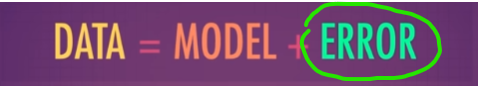

In [106]:
# return training error for each instance
train_error = y_train-y_hat_train
print('Training Error is:\n',train_error)

Training Error is:
 968    -0.149080
825    -0.290916
521    -0.123811
495    -0.392838
683     0.054508
          ...   
1157    1.235555
853    -0.175013
931     0.036145
625    -0.112992
766     0.089584
Name: charges, Length: 958, dtype: float64


#### Training MAE

Mean Absolute Error MAE: Represents average error

$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_{i} - \hat y_{i}|$$

In [107]:
# return training mean absolute error
training_mae = np.sum(abs(train_error))/len(train_error)
print('\nTraining Mean Absolute Error', training_mae)


Training Mean Absolute Error 0.24798635787533327


The MAE informs us that **on average, our model has an error of** $4,235.38 when **predicting the charges of policy holders in our training data**.

#### Training MSE

The Mean Squared Error, or MSE tells us how close a regression line is to a set of true points. This is achieved by squaring the errors. It contrasts to MAE because it gives more weight to larger distances between the points to the regression line.

**MSE is more useful if we are concerned about large errors whose consequences are much larger than equivalent smaller ones**.

$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$$

In [108]:
# return standard error
se = np.sum(train_error**2)
print('\nSquared Training Error is', se)
  
# return MSE
mse = se/len(y_train) 
print('\nMean Squared Training Error is', mse)


Squared Training Error is 175.26413349531657

Mean Squared Training Error is 0.18294794728112376


Our MSE is useful if we are comparing the predictive performance of two or more models. It's values are less interpretable than MAE and RMSE because they are not in the same units as our dependent variable.

#### Training RMSE

Root Mean Square Error: Interpretable MSE in units of y. 

RMSE is more sensitive to outliers, and penalizes large errors more than MAE because errors are squared.

$$RMSE = \sqrt\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$$

In [109]:
# return RMSE Training
rmse = np.sqrt(mse)
print('\nRoot Mean Square Training Error is', rmse)


Root Mean Square Training Error is 0.4277241485830836


Here our RMSE informs us that the expected error between the true value and the value our model predicts is $6,142 when predicting the charges of policy holders in our training data. **This is larger than our MAE of 4,235.38. When MAE < RMSE, it can be indicative that there are outliers present in our data**.

In [110]:
#from scipy import stats

In [111]:
#outlier_low = insurance_df['charges'].quantile(0.01)
#outlier_low

In [112]:
#outlier_high = insurance_df['charges'].quantile(0.99)
#outlier_high

#### Training R Squared

The percentage of variation explained by the relationship between the dependent variable and the independent variable. Lies within values between 0 and 1.

$$SS_{residual} = \sum (y - \hat{y})^2 $$

is the squared difference between $y$ and $\hat y$ (predicted y)

$$SS_{total} = \sum (y - \bar{y})^2 $$

is the squared difference between $y$ and $\overline y$ (mean of y)

So that

$$R^2 = 1- \dfrac{SS_{residual}}{SS_{total}}$$


In [113]:
# return training R squared
SSt = np.sum((y_train - y_train.mean())**2)
R2 = 1- (se/SSt)
print('\nTraining R squared is', R2)


Training R squared is 0.7156852050031214


This means there is 73.6% less variation around the regression line than the mean, or **the relationship between the dependent variable and the independent variables explains 73.6% of the variation in the training data**.

#### Training Adjusted R Squared

***Adjusted $R^2$***: The Adjusted $R^2$ is a key metric for evaluation of a multivariate linear regression model, as it accounts for the number of predictors in a model when calculating the model's goodness-of-fit. It is a more accurate measure for assessing if our model explains changes in the dependent variable. 

$$R^2_{adj}= 1-(1-R^2)\dfrac{n-1}{n-p-1}$$

In [114]:
#display adjusted R-squared
adj_r2 = 1 - (1-linreg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('\nTraining Adjusted R squared is', adj_r2)


Training Adjusted R squared is 0.7138914208075575


An Adjusted R-squared value of 0.735 can be described conceptually as: 

> ***73.5% of the variations in dependent variable $y$ are explained by the independent variables $x$ in our model.***

### Testing Results

Recall that...

In [115]:
# create and view test residuals
test_residuals = y_test - y_hat_test
test_residuals

221    -0.064311
372    -0.090800
56     -0.231043
300    -0.113897
695    -0.182654
          ...   
1259   -0.041965
66     -0.098312
559    -0.476441
769    -0.055186
1009   -0.056208
Name: charges, Length: 240, dtype: float64

#### Compare Test and Train Performance

In [116]:
# import metrics modules from sklearn.metrics library
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [117]:
# print training and testing MAE
print('Training Mean Absolute Error', training_mae)
print('Testing Mean Absolute Error', mean_absolute_error(y_test, y_hat_test))

# create and print standard error variable
se = np.sum(train_error**2)
print('\nTraining Squared Error is', se)

# create and print mean squared error variable
mse = se/len(y_train) 
print('\nTraining Mean Squared Error is', mse)
print('Testing Mean Squared Error is', mean_squared_error(y_test,y_hat_test))

# create and print root mean squared error
rmse = np.sqrt(mse)
print('\nTraining Root Mean Squared Error is', rmse)
print('Testing Root Mean Squared Error is', np.sqrt(mean_squared_error(y_test,y_hat_test)))
  
# create and view training and testing r squared
SSt = np.sum((y_train - y_train.mean())**2)
R2 = 1- (se/SSt)
print('\nTraining R squared is', R2)
print('Testing R squared is',r2_score(y_test,y_hat_test))

#display adjusted R-squared
train_adj_r2 = 1 - (1-linreg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('\nTraining Adjusted R squared is', train_adj_r2)
test_adj_r2 = 1 - (1-linreg.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Testing Adjusted R squared is', test_adj_r2)

Training Mean Absolute Error 0.24798635787533327
Testing Mean Absolute Error 0.2505005453672462

Training Squared Error is 175.26413349531657

Training Mean Squared Error is 0.18294794728112376
Testing Mean Squared Error is 0.18733112086164966

Training Root Mean Squared Error is 0.4277241485830836
Testing Root Mean Squared Error is 0.43281765313079557

Training R squared is 0.7156852050031214
Testing R squared is 0.6791403779435453

Training Adjusted R squared is 0.7138914208075575
Testing Adjusted R squared is 0.6708778984056109


**If our model has a higher error for the training set than the test set then we know that our model is not generalizing well and is too complicated, it is overfitting**. In this case we would need to optimize our model and continue iterating through training and testing.

# Practice

### Data Description

In [118]:
# import dataset
cars_df = pd.read_csv('cars.csv')

| Column     | Description                                                                                                                                                                                                                |
|------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `name`      | **Name of the cars**                                                                                                                                                                                             |
| `year`      | **Year of the car when it was bought**                                                                                                                                                                              |
| `selling_price`      | **Price at which the car is being sold**                                                                                                                                                   |
| `km_driven`   | **Number of Kilometres the car is driven**                                                                                                                                                                      |
| `fuel`   | **Fuel type of car (petrol / diesel / CNG / LPG / electric)**                                                                                                                               |
| `seller_type`  | **Tells if a Seller is Individual or a Dealer**                                                                                                                                                                    |
| `transmission`  | **Gear transmission of the car (Automatic/Manual)**                                                                                                                                                                    |
| `owner`  | **Number of previous owners of the car.**                                                                                                                                                                    |

In [119]:
# check DataFrame
cars_df.head()

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine
0,Maruti Swift Dzire VDI,2014,45000.0,14550.0,Diesel,Manual,First Owner,23.4 kmpl,1248 CC
1,Skoda Rapid 1.5 TDI Ambition,2014,37000.0,12000.0,Diesel,Manual,Second Owner,21.14 kmpl,1498 CC
2,Honda City 2017-2020 EXi,2006,15800.0,14000.0,Petrol,Manual,Third Owner,17.7 kmpl,1497 CC
3,Hyundai i20 Sportz Diesel,2010,22500.0,12700.0,Diesel,Manual,First Owner,23.0 kmpl,1396 CC
4,Maruti Swift VXI BSIII,2007,13000.0,12000.0,Petrol,Manual,First Owner,16.1 kmpl,1298 CC


In [120]:
# clean dataset
# Replace dollar sign and commas for production_budget column
cars_df['mileage'] = cars_df['mileage'].str.replace(' kmpl', '')
cars_df['mileage'] = cars_df['mileage'].str.replace(' km/kg', '')
cars_df['mileage'] = cars_df['mileage'].astype('float')

In [121]:
# perform feature engineering
cars_df['age'] = 2022 - cars_df['year']

In [122]:
# work with categorical variables
cars_df = pd.get_dummies(cars_df,columns=['fuel','transmission','owner', 'engine'],drop_first=True)

In [123]:
# drop unnecessary columns
cars_df.drop(columns=['year','name',],inplace=True)

In [124]:
# view descriptive statistics
cars_df.describe()

,selling_price,km_driven,mileage,age,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,...,engine_793 CC,engine_796 CC,engine_799 CC,engine_814 CC,engine_909 CC,engine_936 CC,engine_993 CC,engine_995 CC,engine_998 CC,engine_999 CC
count,8128.000000,8128.000000,7907.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,...,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000
mean,63827.180770,6981.951083,19.418783,8.195989,0.541585,0.004675,0.446727,0.870817,0.021407,0.258981,...,0.000738,0.054626,0.009719,0.014887,0.000369,0.004429,0.003199,0.005290,0.055733,0.009473
std,80625.340351,5655.055496,4.037145,4.044249,0.498298,0.068220,0.497185,0.335423,0.144747,0.438102,...,0.027161,0.227263,0.098113,0.121107,0.019209,0.066408,0.056471,0.072547,0.229420,0.096875
min,2999.900000,0.100000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25499.900000,3500.000000,16.780000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45000.000000,6000.000000,19.300000,7.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,67500.000000,9800.000000,22.320000,11.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,236045.700000,42.000000,39.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [125]:
# drop any missing values
cars_df = cars_df.dropna(axis=0)

In [126]:
# create predictors
predictors = cars_df.drop(['selling_price'], axis=1)

# create intercept
predictors_int = sm.add_constant(predictors)

# create model
model_prac = sm.OLS(cars_df['selling_price'],predictors_int).fit()

# check model coefficients
model_prac.params

const            96155.218425
km_driven           -0.604737
mileage            241.124856
age              -5363.314260
fuel_Diesel      -7975.630563
                     ...     
engine_936 CC    -3128.724366
engine_993 CC    31880.519416
engine_995 CC    -9186.436052
engine_998 CC   -14942.386261
engine_999 CC   -29408.025662
Length: 132, dtype: float64

## Practice Summary

In [127]:
# view model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     486.4
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          4.39e-316
Time:                        15:57:45   Log-Likelihood:                -683.47
No. Observations:                1198   AIC:                             1381.
Df Residuals:                    1191   BIC:                             1417.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1975      0.074     96.948      0.000       7.052       7.343
age            0.0374      0.001     41.974      0.000       0.036       0.039
sex           -0.0892      0.025     -3.593      0.000      -0.138      -0.041
bmi            0.0043      0.002      1.971      0.049    1.92e-05       0.009
children       0.1091      0.010     10.662      0.000       0.089       0.129
smoker         1.3041      0.040     32.301      0.000       1.225       1.383
region        -0.0594      0.011     -5.246      0.000      -0.082      -0.037
==============================================================================
Omnibus:                      579.495   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3080.635
Skew:                           2.258   Prob(JB):                         0.00
Kurtosis:                       9.428   Cond. No.                         310.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Questions

1. How much variation does our model explain within the data?

2. Based on the p-value of the t-test, which feature has the least statistical influence on the dependent variable?

3. What is the economic impact of the `Vehicle_Age` estimated coefficient?

# Q & A

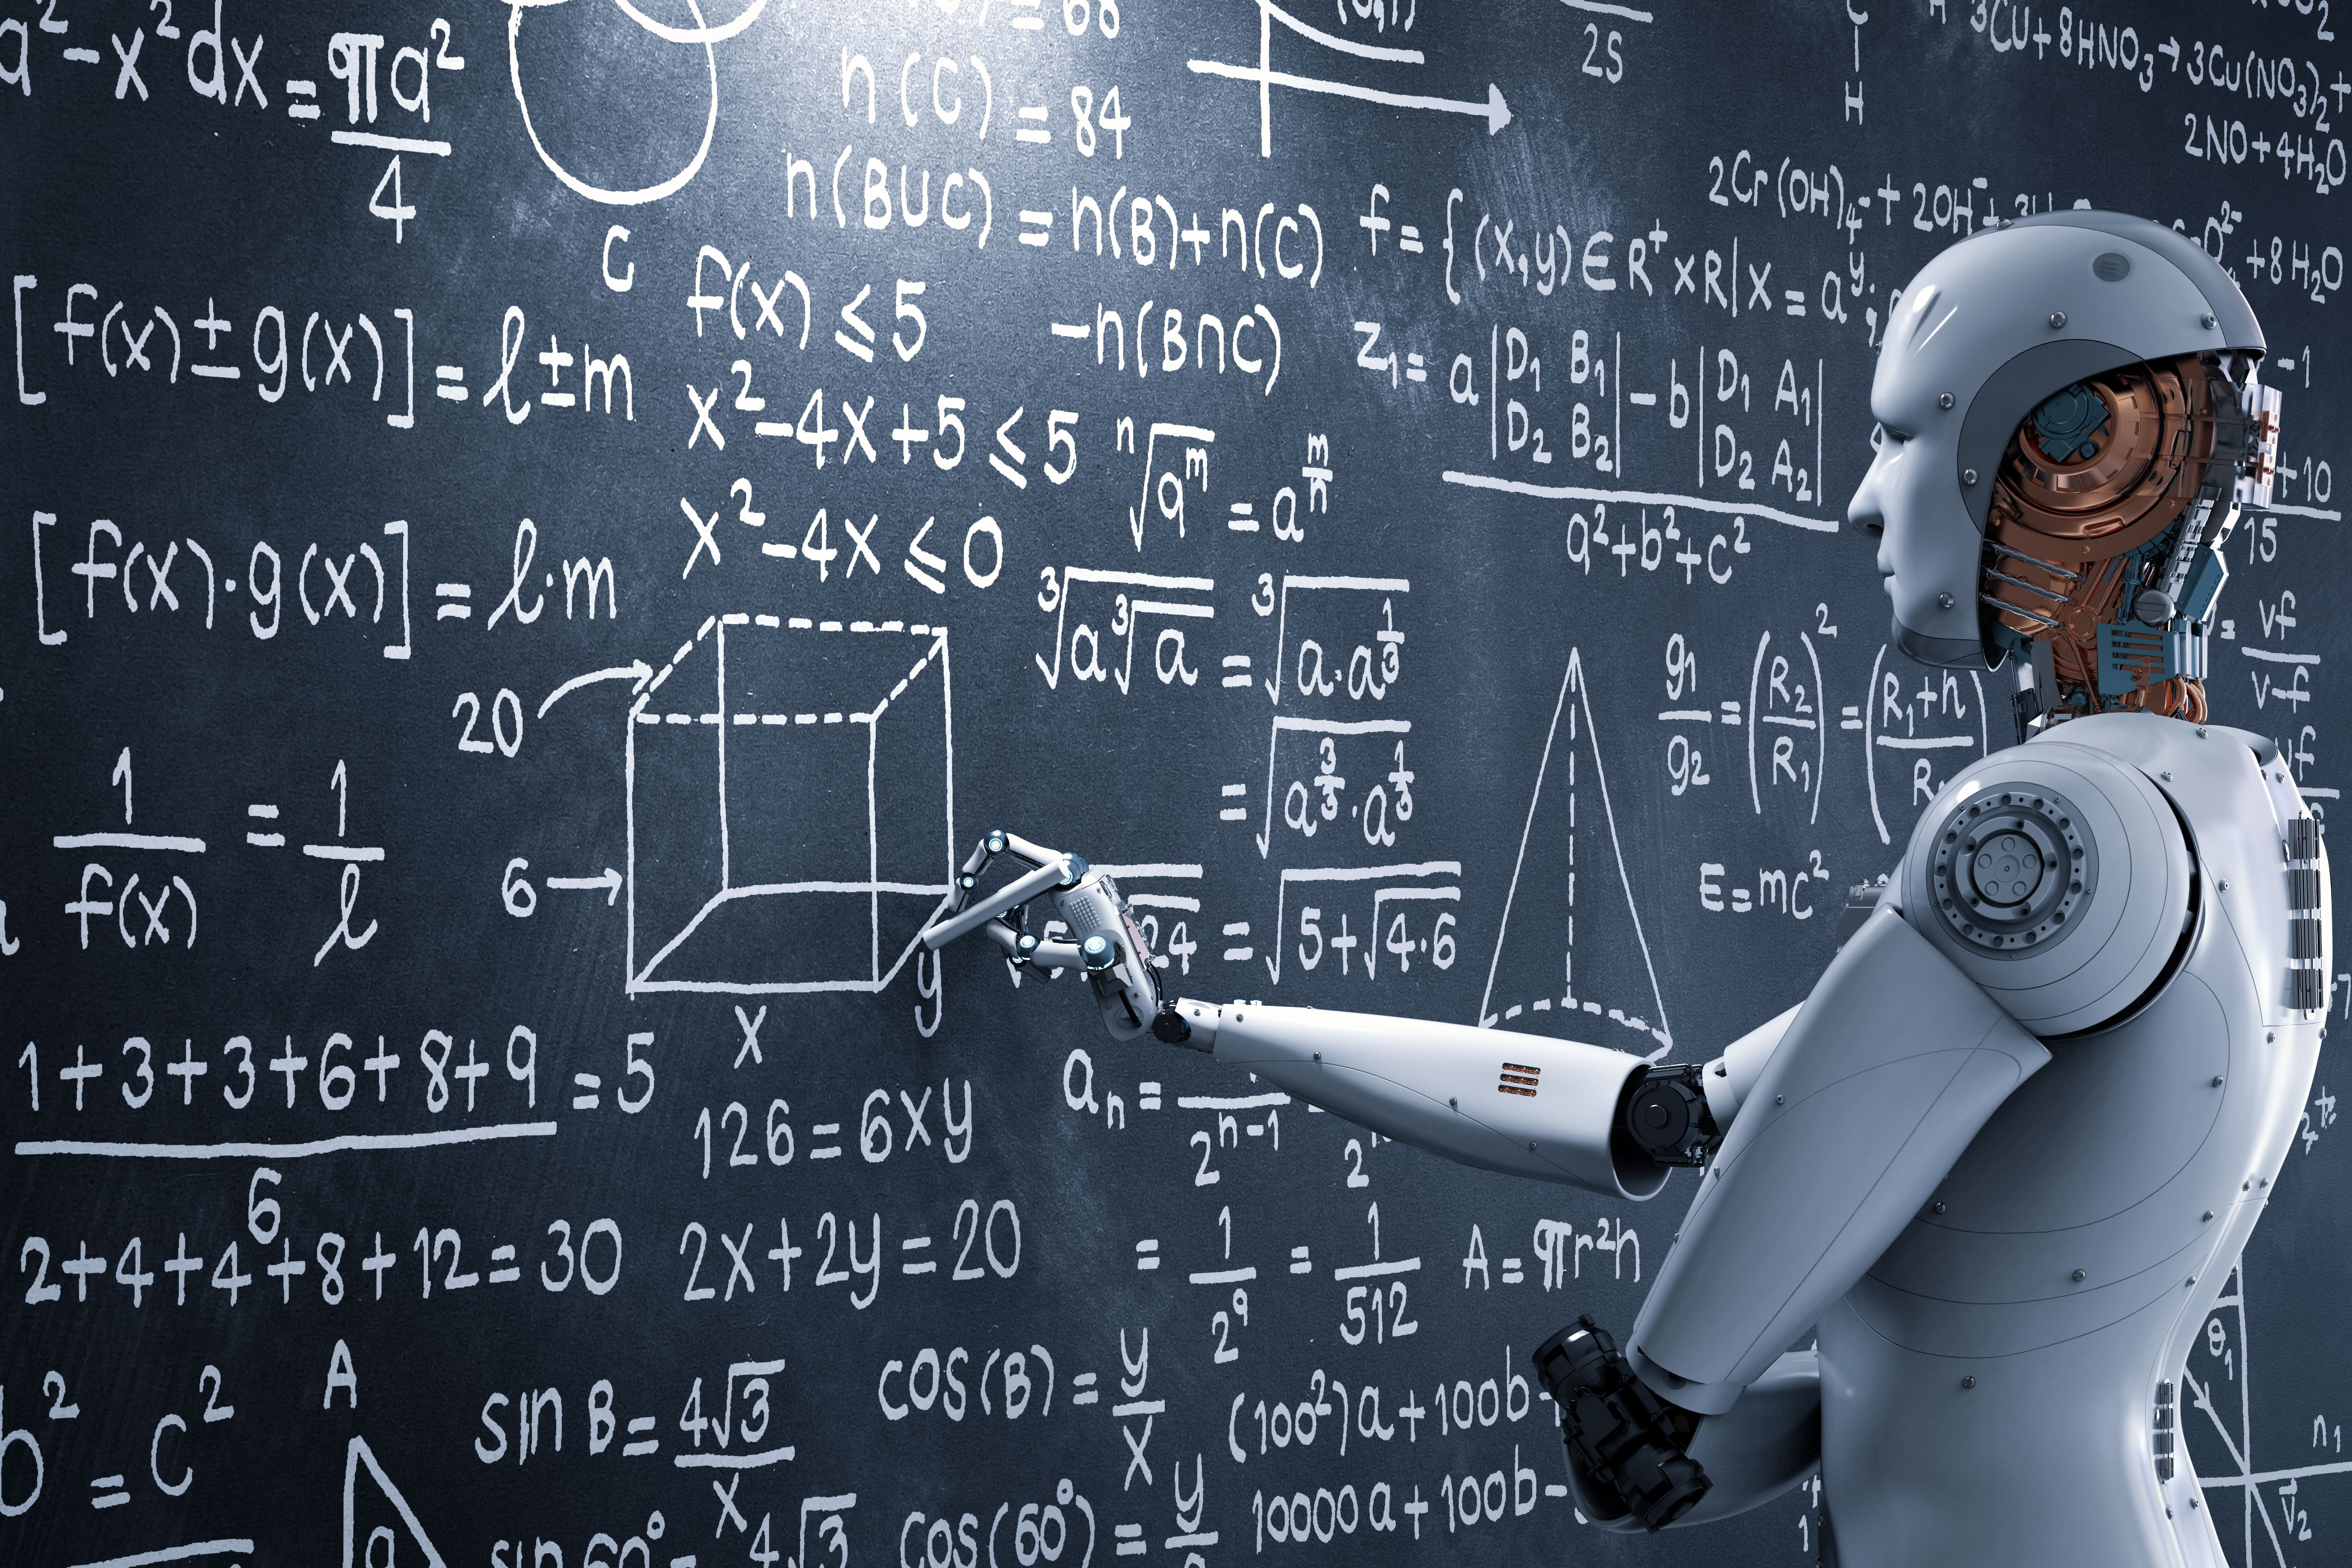

# Thank You

In [128]:
###############################################################################################################################
###############################################################################################################################
                                                            #THANKS#
###############################################################################################################################
###############################################################################################################################